<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/main/vdtuan12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.9 MB/s eta 0:00:00


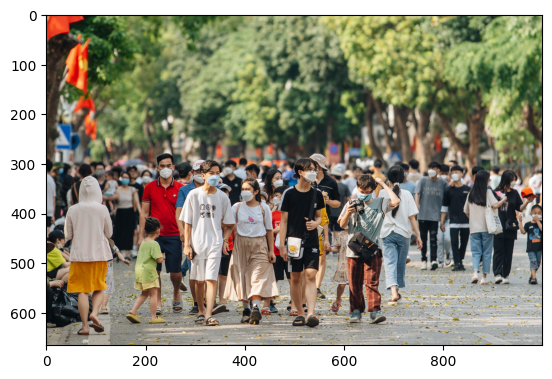

In [14]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename = '/content/va06535-1651311390376492736188(1).jpg'
img = plt.imread(filename)
plt.imshow(img)

In [15]:
detector = MTCNN()
faces = detector.detect_faces(img)

3/3 [==============================] - 0s 42ms/step


In [16]:
for face in faces:
  print(face)

{'box': [456, 319, 22, 28], 'confidence': 0.9998840689659119, 'keypoints': {'left_eye': (466, 331), 'right_eye': (474, 331), 'nose': (472, 337), 'mouth_left': (466, 341), 'mouth_right': (472, 341)}}
{'box': [320, 305, 31, 38], 'confidence': 0.9998328685760498, 'keypoints': {'left_eye': (333, 320), 'right_eye': (346, 320), 'nose': (343, 327), 'mouth_left': (334, 334), 'mouth_right': (345, 334)}}
{'box': [227, 292, 26, 32], 'confidence': 0.9994529485702515, 'keypoints': {'left_eye': (234, 306), 'right_eye': (247, 305), 'nose': (241, 314), 'mouth_left': (236, 318), 'mouth_right': (247, 317)}}
{'box': [979, 391, 20, 25], 'confidence': 0.9931128621101379, 'keypoints': {'left_eye': (986, 402), 'right_eye': (995, 402), 'nose': (990, 406), 'mouth_left': (987, 412), 'mouth_right': (993, 412)}}
{'box': [394, 341, 21, 27], 'confidence': 0.9851884245872498, 'keypoints': {'left_eye': (398, 353), 'right_eye': (407, 352), 'nose': (401, 358), 'mouth_left': (400, 364), 'mouth_right': (407, 362)}}
{'box

3/3 [==============================] - 0s 39ms/step


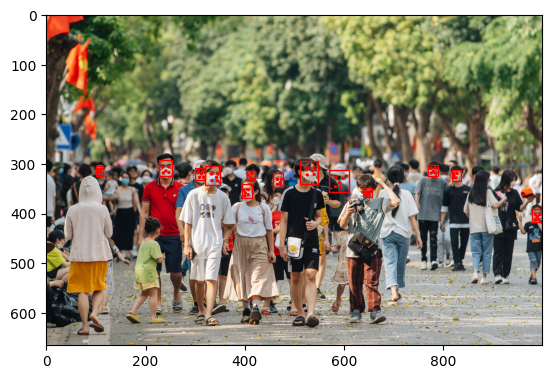

In [23]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename = '/content/va06535-1651311390376492736188(1).jpg'
detector = MTCNN()
faces = detector.detect_faces(img)
plt.imshow(img)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect = plt.Rectangle((x,y),width,height,fill = False,color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius = 2,color='red')
    ax.add_patch(dot)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/dectect1.jpg')
plt.show()

1/1 [==============================] - 0s 185ms/step


3/3 [==============================] - 0s 38ms/step


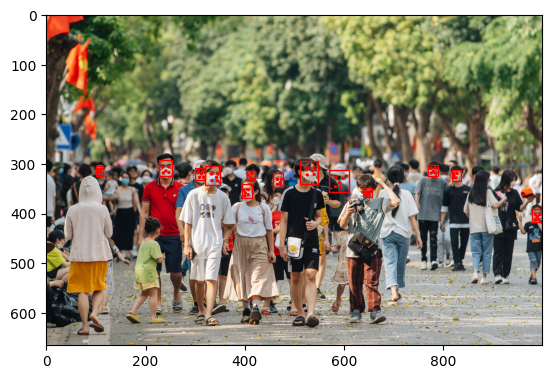

In [26]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename = '/content/va06535-1651311390376492736188(1).jpg'
detector = MTCNN()
img = plt.imread(filename)
faces = detector.detect_faces(img)
plt.imshow(img)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect = plt.Rectangle((x,y),width,height,fill = False,color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius = 2,color='red')
    ax.add_patch(dot)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/dectect3.jpg')
plt.show()


3/3 [==============================] - 0s 42ms/step


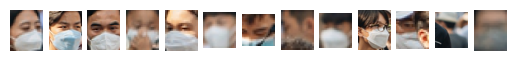

In [30]:
def down_face(filename,result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height = result_list[i]['box']
    x2,y2=x1+width,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/dectect'+str(i)+'.jpg')
  plt.show()
filename='/content/va06535-1651311390376492736188(1).jpg'
img =plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
down_face(filename,faces)

In [35]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/download.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n02124075', 'Egyptian_cat', 0.77166057), ('n02123045', 'tabby', 0.16850814), ('n02128757', 'snow_leopard', 0.02365259)]


1/1 [==============================] - 1s 1s/step
Predicted: [('n02124075', 'Egyptian_cat', 0.77166057), ('n02123045', 'tabby', 0.16850814), ('n02128757', 'snow_leopard', 0.02365259)]


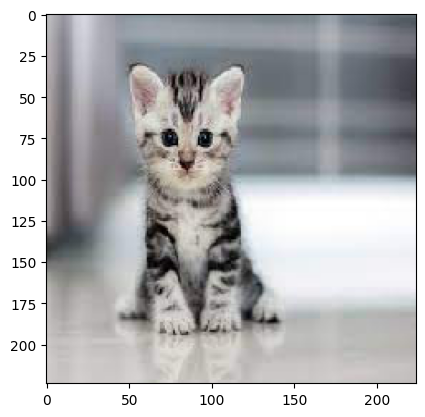

In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/download.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [50]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

img_path = '/content/download.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(features, top=3)[0])

1/1 [==============================] - 1s 764ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.9330332), ('n02123045', 'tabby', 0.023221057), ('n02123159', 'tiger_cat', 0.011382166)]


In [54]:
pip install youtube_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from youtube_search import YoutubeSearch
import webbrowser
mysong = input('nhạp ten bai hat　：')
result = YoutubeSearch(mysong,max_results=10).to_dict()
print(result)

nhạp ten bai hatはれはれや
[{'id': 'eg65SbqmT0s', 'thumbnails': ['https://i.ytimg.com/vi/eg65SbqmT0s/hq720.jpg?sqp=-oaymwE9COgCEMoBSFryq4qpAy8IARUAAAAAGAElAADIQj0AgKJDeAHwAQH4Af4JgALQBYoCDAgAEAEYPyA_KHIwDw==&rs=AOn4CLDhCHmfjEwKAxPr6kPKJND4XdKHww', 'https://i.ytimg.com/vi/eg65SbqmT0s/hq720.jpg?sqp=-oaymwExCNAFEJQDSFryq4qpAyMIARUAAIhCGAHwAQH4Af4JgALQBYoCDAgAEAEYPyA_KHIwDw==&rs=AOn4CLD0N5lI0uyTNcUT7TwrA9kWM1FROw'], 'title': '【感情を込めて】ハレハレヤ 歌ってみた ver.Sou', 'long_desc': None, 'channel': 'Sou', 'duration': '3:29', 'views': '110,231,471 views', 'publish_time': '4 years ago', 'url_suffix': '/watch?v=eg65SbqmT0s&pp=ygUP44Gv44KM44Gv44KM44KE'}, {'id': '2B7MEADeLyA', 'thumbnails': ['https://i.ytimg.com/vi/2B7MEADeLyA/hqdefault.jpg?sqp=-oaymwE9COADEI4CSFryq4qpAy8IARUAAAAAGAElAADIQj0AgKJDeAHwAQH4Af4JgALQBYoCDAgAEAEYQyBDKHIwDw==&rs=AOn4CLDs0kYhiHlErs7n8XbUWNl3imgUgw'], 'title': 'ハレハレヤ / flower', 'long_desc': None, 'channel': '羽生まゐご', 'duration': '3:29', 'views': '6,530,234 views', 'publish_time': '4 years 

In [59]:
print(result[0]['url_suffix'])
url = 'http://www.youtube.com'+result[0]['url_suffix']
print(url)
webbrowser.open(url)
print('bai hat yeu thich')

/watch?v=eg65SbqmT0s&pp=ygUP44Gv44KM44Gv44KM44KE
http://www.youtube.com/watch?v=eg65SbqmT0s&pp=ygUP44Gv44KM44Gv44KM44KE
bai hat yeu thich


In [60]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from youtube_search import YoutubeSearch
import webbrowser
from openpyxl import Workbook
data = Workbook()
sheet = data.active
mysong = input('xin mời chọn bài hát ')
print(mysong)
result = YoutubeSearch(mysong,max_results=10).to_dict()
print(result)
for i in range(10):
  print(result[i]['title'])
  print(result[i]['url_suffix'])
  url = 'http://www.youtube.com'+result[i]['url_suffix']
  print(url)
  sheet['A'+str(i+1)]=i+1
  sheet['B'+str(i+1)]=result[i]['title']
  sheet['C'+str(i+1)]=result[i]['url_suffix']
  sheet['D'+str(i+1)]=result[i]['views']
  sheet['E'+str(i+1)]=result[i]['publish_time']
  sheet['F'+str(i+1)]=result[i]['channel']
  sheet['G'+str(i+1)]=result[i]['duration']
data.save('/content/drive/MyDrive/Colab Notebooks/tth.xlsx')

xin mời chọn bài hát はれはれや
はれはれや
[{'id': 'eg65SbqmT0s', 'thumbnails': ['https://i.ytimg.com/vi/eg65SbqmT0s/hq720.jpg?sqp=-oaymwE9COgCEMoBSFryq4qpAy8IARUAAAAAGAElAADIQj0AgKJDeAHwAQH4Af4JgALQBYoCDAgAEAEYPyA_KHIwDw==&rs=AOn4CLDhCHmfjEwKAxPr6kPKJND4XdKHww', 'https://i.ytimg.com/vi/eg65SbqmT0s/hq720.jpg?sqp=-oaymwExCNAFEJQDSFryq4qpAyMIARUAAIhCGAHwAQH4Af4JgALQBYoCDAgAEAEYPyA_KHIwDw==&rs=AOn4CLD0N5lI0uyTNcUT7TwrA9kWM1FROw'], 'title': '【感情を込めて】ハレハレヤ 歌ってみた ver.Sou', 'long_desc': None, 'channel': 'Sou', 'duration': '3:29', 'views': '110,232,361 views', 'publish_time': '4 years ago', 'url_suffix': '/watch?v=eg65SbqmT0s&pp=ygUP44Gv44KM44Gv44KM44KE'}, {'id': '2B7MEADeLyA', 'thumbnails': ['https://i.ytimg.com/vi/2B7MEADeLyA/hqdefault.jpg?sqp=-oaymwE9COADEI4CSFryq4qpAy8IARUAAAAAGAElAADIQj0AgKJDeAHwAQH4Af4JgALQBYoCDAgAEAEYQyBDKHIwDw==&rs=AOn4CLDs0kYhiHlErs7n8XbUWNl3imgUgw'], 'title': 'ハレハレヤ / flower', 'long_desc': None, 'channel': '羽生まゐご', 'duration': '3:29', 'views': '6,530,265 views', 'publish_time'